In [1]:
using AA222
using PyPlot
using Distributions

INFO: Loading help data...


# Differential Evolution

In [2]:
function randThreeIndividuals(X, i)
    # returns three individuals from X, but not the ith one
    populationSize = size(X,2)
    (a,b,c) = (i + sample(1:(populationSize - 1), 3, replace = false)) % populationSize + 1  
    return (X[:,a], X[:,b], X[:,c])
end

function differentialEvolutionStep!(X, f::Function, 
    differentialWeight = 1.0, crossoverProbability = 0.5, populationSize = 20)
    dimensions = size(X, 1)
    y = zeros(dimensions)
    for i = 1:populationSize
        x = X[:,i]
        (a,b,c) = randThreeIndividuals(X, i)
        randomIndex = sample(1:dimensions)
        for j = 1:dimensions
            if randbool() < crossoverProbability || j == randomIndex
                y[j] = a[j] + differentialWeight * (b[j] - c[j])
            else
                y[j] = x[j]
            end
        end
        if f(y) < f(x)
            X[:,i] = y
        end
    end
    return X
end

function differentialEvolution(f::Function, dimensions; 
    steps = 10, differentialWeight = 1.0, 
    crossoverProbability = 0.5, populationSize = 20, generateRandomIndividual = rand)
    X = zeros(dimensions, populationSize)
    for i = 1:populationSize
        X[:,i] = generateRandomIndividual(dimensions)
    end
    for i = 1:steps
        differentialEvolutionStep!(X, f, differentialWeight, crossoverProbability, populationSize)
    end 
    return X
end

differentialEvolution (generic function with 1 method)

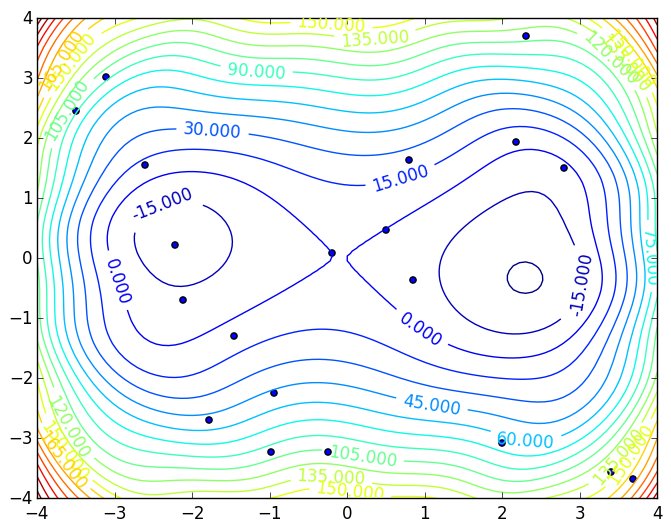

In [3]:
f(x) = -10x[1]^2 + 10x[2]^2 + 4sin(x[1]*x[2]) - 2x[1] + x[1]^4
X = differentialEvolution(f, 2, steps = 0, generateRandomIndividual = (n -> rand(n) * 8 - 4))
xdom(-4,4)
ydom(-4,4)
contour(f, 20)
scatter(X);

# Cross Entropy Method

In [4]:
function crossEntropyMethod(f, distribution; steps = 10, populationSize = 100, eliteSize = 10)
    while true
        samples = rand(distribution, populationSize)
        index = sortperm([f(samples[:,j]) for j=1:populationSize])
        eliteSamples = samples[:,index[1:eliteSize]]
        distribution = fit_mle(MvNormal, eliteSamples)
        if steps == 0
            return samples
        else
            steps = steps - 1
        end
    end
end

crossEntropyMethod (generic function with 1 method)

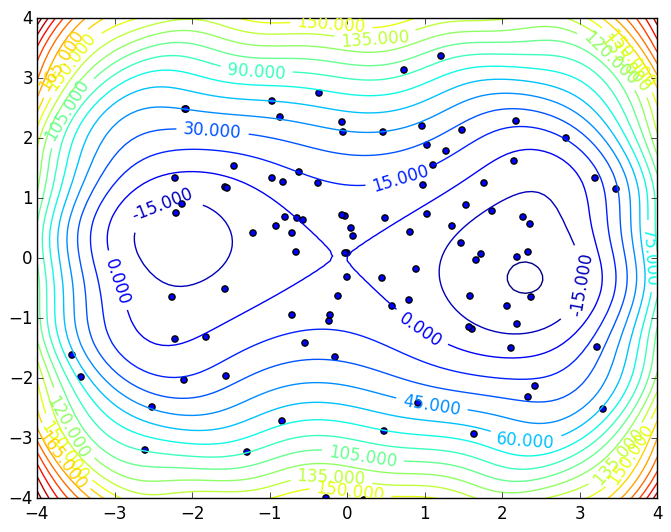

In [5]:
f(x) = -10x[1]^2 + 10x[2]^2 + 4sin(x[1]*x[2]) - 2x[1] + x[1]^4
samples = crossEntropyMethod(f, MvNormal(eye(2) * 3), steps = 0)
xdom(-4,4)
ydom(-4,4)
contour(f, 20)
scatter(samples);